# 1. Introduction

In this project, we aim to predict whether a customer will change telecommunications provider, something known as "churning".

To achieve it, we are going to analyze and clean data, build several models and tune them to reach an acceptable metrics which, in this case, it will be accuracy.

About the models, these will be our classification models:
 - `LogisticRegression`: fast and linear model.
 - `KNeighborsClassifier`: fast, simple and instance-based.
 - `DecisionTreeClassifier`:  slower but accurate model used here in the non-linear form.
 - `RandomForestClassifier`: slower but accurate ensemble model based on decision trees.
 - `GradientBoostingClassifier`: combines several weak learning models to produce a powerful predicting model.

About dataset:

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

   - "state", string. 2-letter code of the US state of customer residence
   - "account_length", numerical. Number of months the customer has been with the current telco provider
   - "area_code", string="area_code_AAA" where AAA = 3 digit area code.
   - "international_plan", (yes/no). The customer has international plan.
   - "voice_mail_plan", (yes/no). The customer has voice mail plan.
   - "number_vmail_messages", numerical. Number of voice-mail messages.
   - "total_day_minutes", numerical. Total minutes of day calls.
   - "total_day_calls", numerical. Total minutes of day calls.
   - "total_day_charge", numerical. Total charge of day calls.
   - "total_eve_minutes", numerical. Total minutes of evening calls.
   - "total_eve_calls", numerical. Total number of evening calls.
   - "total_eve_charge", numerical. Total charge of evening calls.
   - "total_night_minutes", numerical. Total minutes of night calls.
   - "total_night_calls", numerical. Total number of night calls.
   - "total_night_charge", numerical. Total charge of night calls.
   - "total_intl_minutes", numerical. Total minutes of international calls.
   - "total_intl_calls", numerical. Total number of international calls.
   - "total_intl_charge", numerical. Total charge of international calls
   - "number_customer_service_calls", numerical. Number of calls to customer service
   - "churn", (yes/no). Customer churn - target variable.


## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Load dataset

In [2]:
df = pd.read_csv('Data/train_churn.csv') 
print(df.shape)
df.head()

(4250, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


Segregation by looking at the data:
 - Categorical:
   - state: Nominal
   - area_code: Nominal
   - international_plan: Binary
   - voice_mail_plan: Binary
 - Numerical:
   - account_length
   - number_vmail_messages
   - total_day_minutes
   - total_day_calls
   - total_day_charge
   - total_eve_minutes
   - total_eve_calls
   - total_eve_charge
   - total_night_minutes
   - total_night_calls
   - total_night_charge
   - total_intl_minutes
   - total_intl_calls
   - total_intl_charge
   - number_customer_service_calls

# 3. Data Observations

## 3.1 Churn ratio

In [3]:
churn_ratio =  pd.DataFrame(round(df['churn'].value_counts()/len(df['churn']),2)).T 

churn_ratio = churn_ratio.rename(columns={'no':'No Churn' ,
                                          'yes':'Churn'})
churn_ratio 

,No Churn,Churn
churn,0.86,0.14


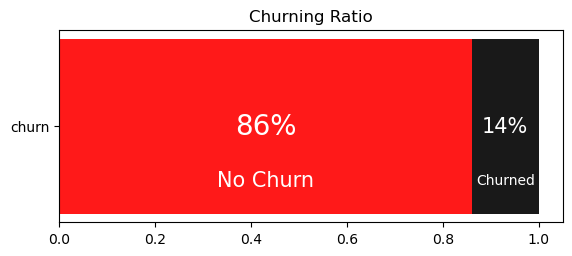

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5))

ax.barh(churn_ratio.index,
        churn_ratio['No Churn'],
        color='red',
        alpha=0.9,
        label='Male')

ax.barh(churn_ratio.index,
        churn_ratio['Churn'],
        left=churn_ratio['No Churn'],
        color='black',
        alpha=0.9,
        label='Female')

for i in churn_ratio.index:
    not_churn_percent = int(churn_ratio['No Churn'][i] * 100)
    ax.annotate(f'{not_churn_percent}%', 
                xy=(churn_ratio['No Churn'][i] / 2, i),
                va='center', ha='center',
                fontsize=20, color='white')
    
    ax.annotate('No Churn',
                xy=(churn_ratio['No Churn'][i] / 2, -0.25),
                va='center', ha='center',
                fontsize=15, color='white')

    churn_percent = int(churn_ratio['Churn'][i] * 100)
    
    ax.annotate(f'{churn_percent}%',
                xy=(churn_ratio['No Churn'][i] + churn_ratio['Churn'][i] / 2, i),
                va='center', ha='center',
                fontsize=15, color='white')
    ax.annotate('Churned', xy=(churn_ratio['No Churn'][i] + churn_ratio['Churn'][i] / 2, -0.25),
                va='center', ha='center',
                 color='white')
    
plt.title('Churning Ratio')
plt.show()

## 3.2 Missing and duplicate values

In [5]:
print(df.isnull().sum().sort_values(ascending=False))
print('Dupplicate values', df.duplicated().sum())

state                            0
account_length                   0
number_customer_service_calls    0
total_intl_charge                0
total_intl_calls                 0
total_intl_minutes               0
total_night_charge               0
total_night_calls                0
total_night_minutes              0
total_eve_charge                 0
total_eve_calls                  0
total_eve_minutes                0
total_day_charge                 0
total_day_calls                  0
total_day_minutes                0
number_vmail_messages            0
voice_mail_plan                  0
international_plan               0
area_code                        0
churn                            0
dtype: int64
Dupplicate values 0


There are no missing or duplicated values.

## 3.3 Filtering columns

In [6]:
print(df.columns)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


In [7]:
cat_columns = []
num_columns = []

cat_columns = df.select_dtypes(include=['object']).columns
cat_columns = cat_columns.drop('state')
num_columns = df.select_dtypes(include=['number']).columns
num_columns = num_columns.drop(['account_length', 'number_customer_service_calls'])

print('Categorical columns: {}'.format(cat_columns.values))
print('Numerical columns: {}'.format(num_columns.values))

Categorical columns: ['area_code' 'international_plan' 'voice_mail_plan' 'churn']
Numerical columns: ['number_vmail_messages' 'total_day_minutes' 'total_day_calls'
 'total_day_charge' 'total_eve_minutes' 'total_eve_calls'
 'total_eve_charge' 'total_night_minutes' 'total_night_calls'
 'total_night_charge' 'total_intl_minutes' 'total_intl_calls'
 'total_intl_charge']


In [8]:
df.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   120
total_eve_calls                   123
total_night_calls                 128
total_intl_minutes                168
total_intl_charge                 168
account_length                    215
total_night_charge                992
total_eve_charge                 1572
total_night_minutes              1757
total_eve_minutes                1773
total_day_charge                 1843
total_day_minutes                1843
dtype: int64

# 4. Exploratory Data Analysis

## 4.1 Univariate analysis

### 4.1.1 Categorical columns distribution

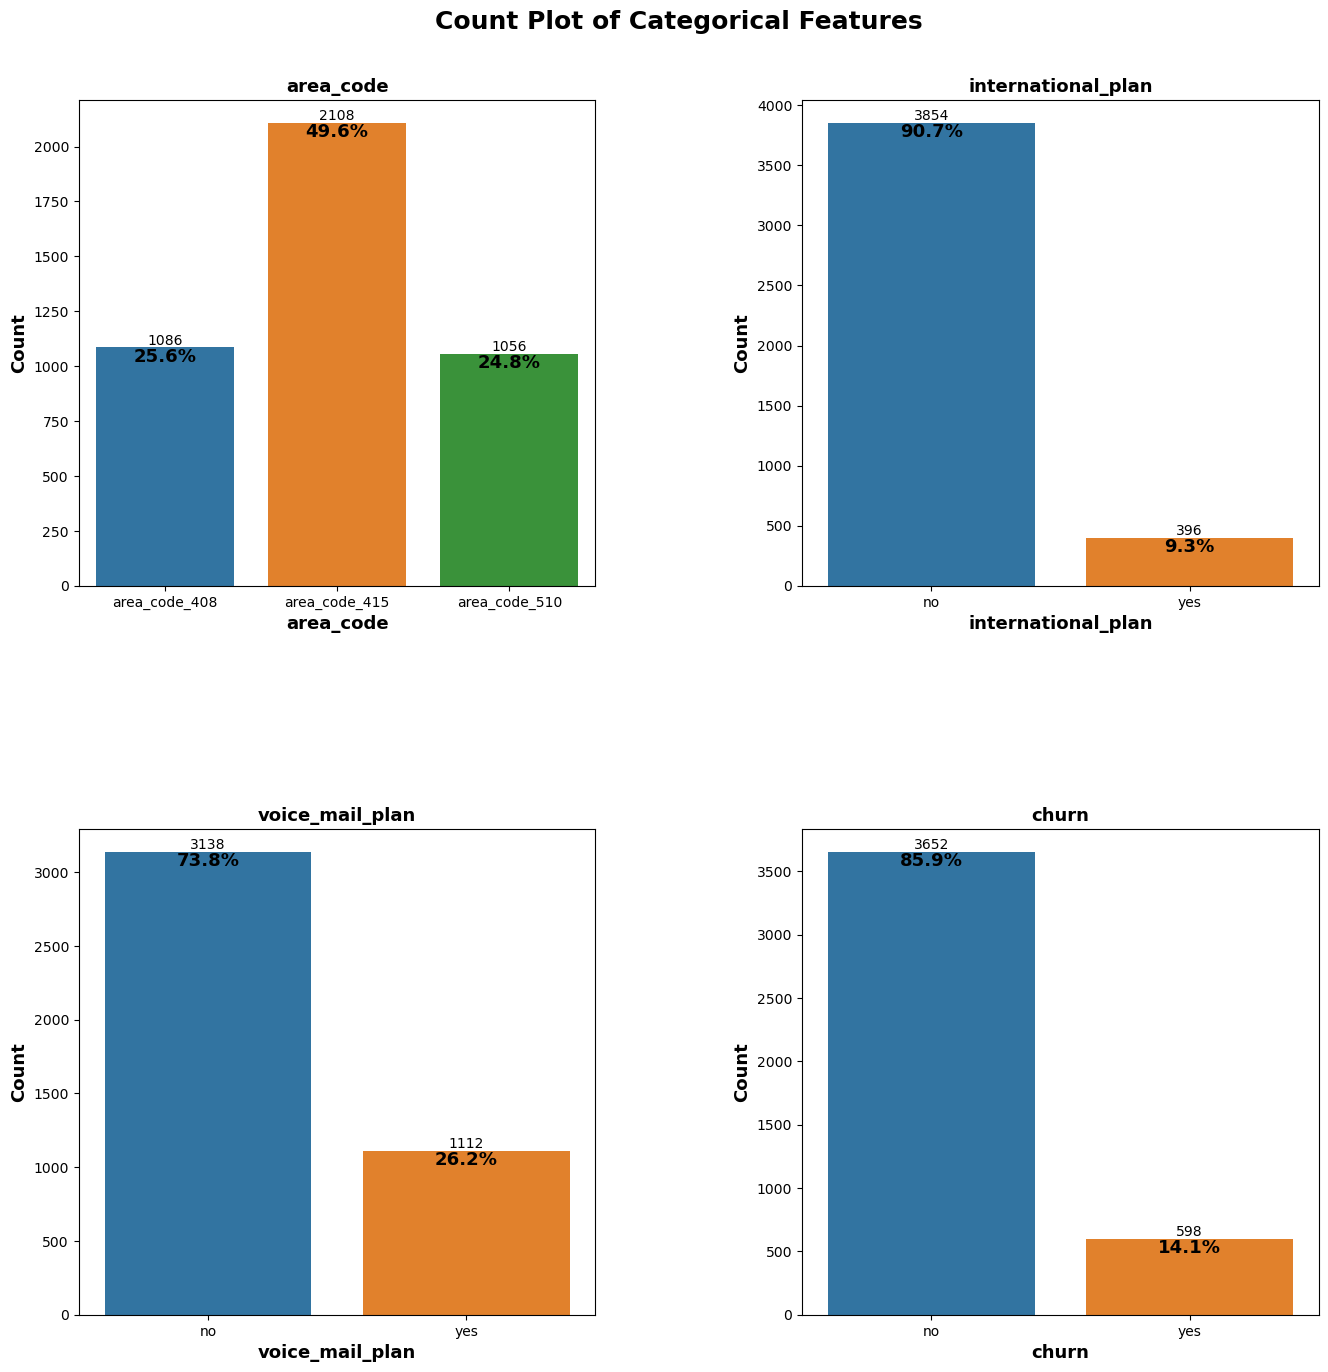

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 15))
fig.suptitle('Count Plot of Categorical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92, hspace=0.5, wspace=0.4)

for column, ax in zip(cat_columns, axes.flatten()):
    values, counts = np.unique(df[column], return_counts=True)
    
    sns.barplot(x=values, y=counts, ax=ax)
    
    # Percentage values
    for i, (value, count) in enumerate(zip(values, counts)):
        if column == 'state':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
            continue
        
        percentage = count / sum(counts) * 100
        ax.text(i, count, f'{percentage:.1f}%', ha='center', va='top', size=13, fontweight='bold')

    ax.set_title(column, size=13, fontweight='bold')
    ax.set_xlabel(column, size=13, fontweight='bold')
    ax.set_ylabel('Count', size=13, fontweight='bold')
    ax.bar_label(ax.containers[0])

plt.show()

### 4.1.2 Numerical columns distribution

In [10]:
colors = sns.color_palette(palette='hls',
                           n_colors=len(num_columns))

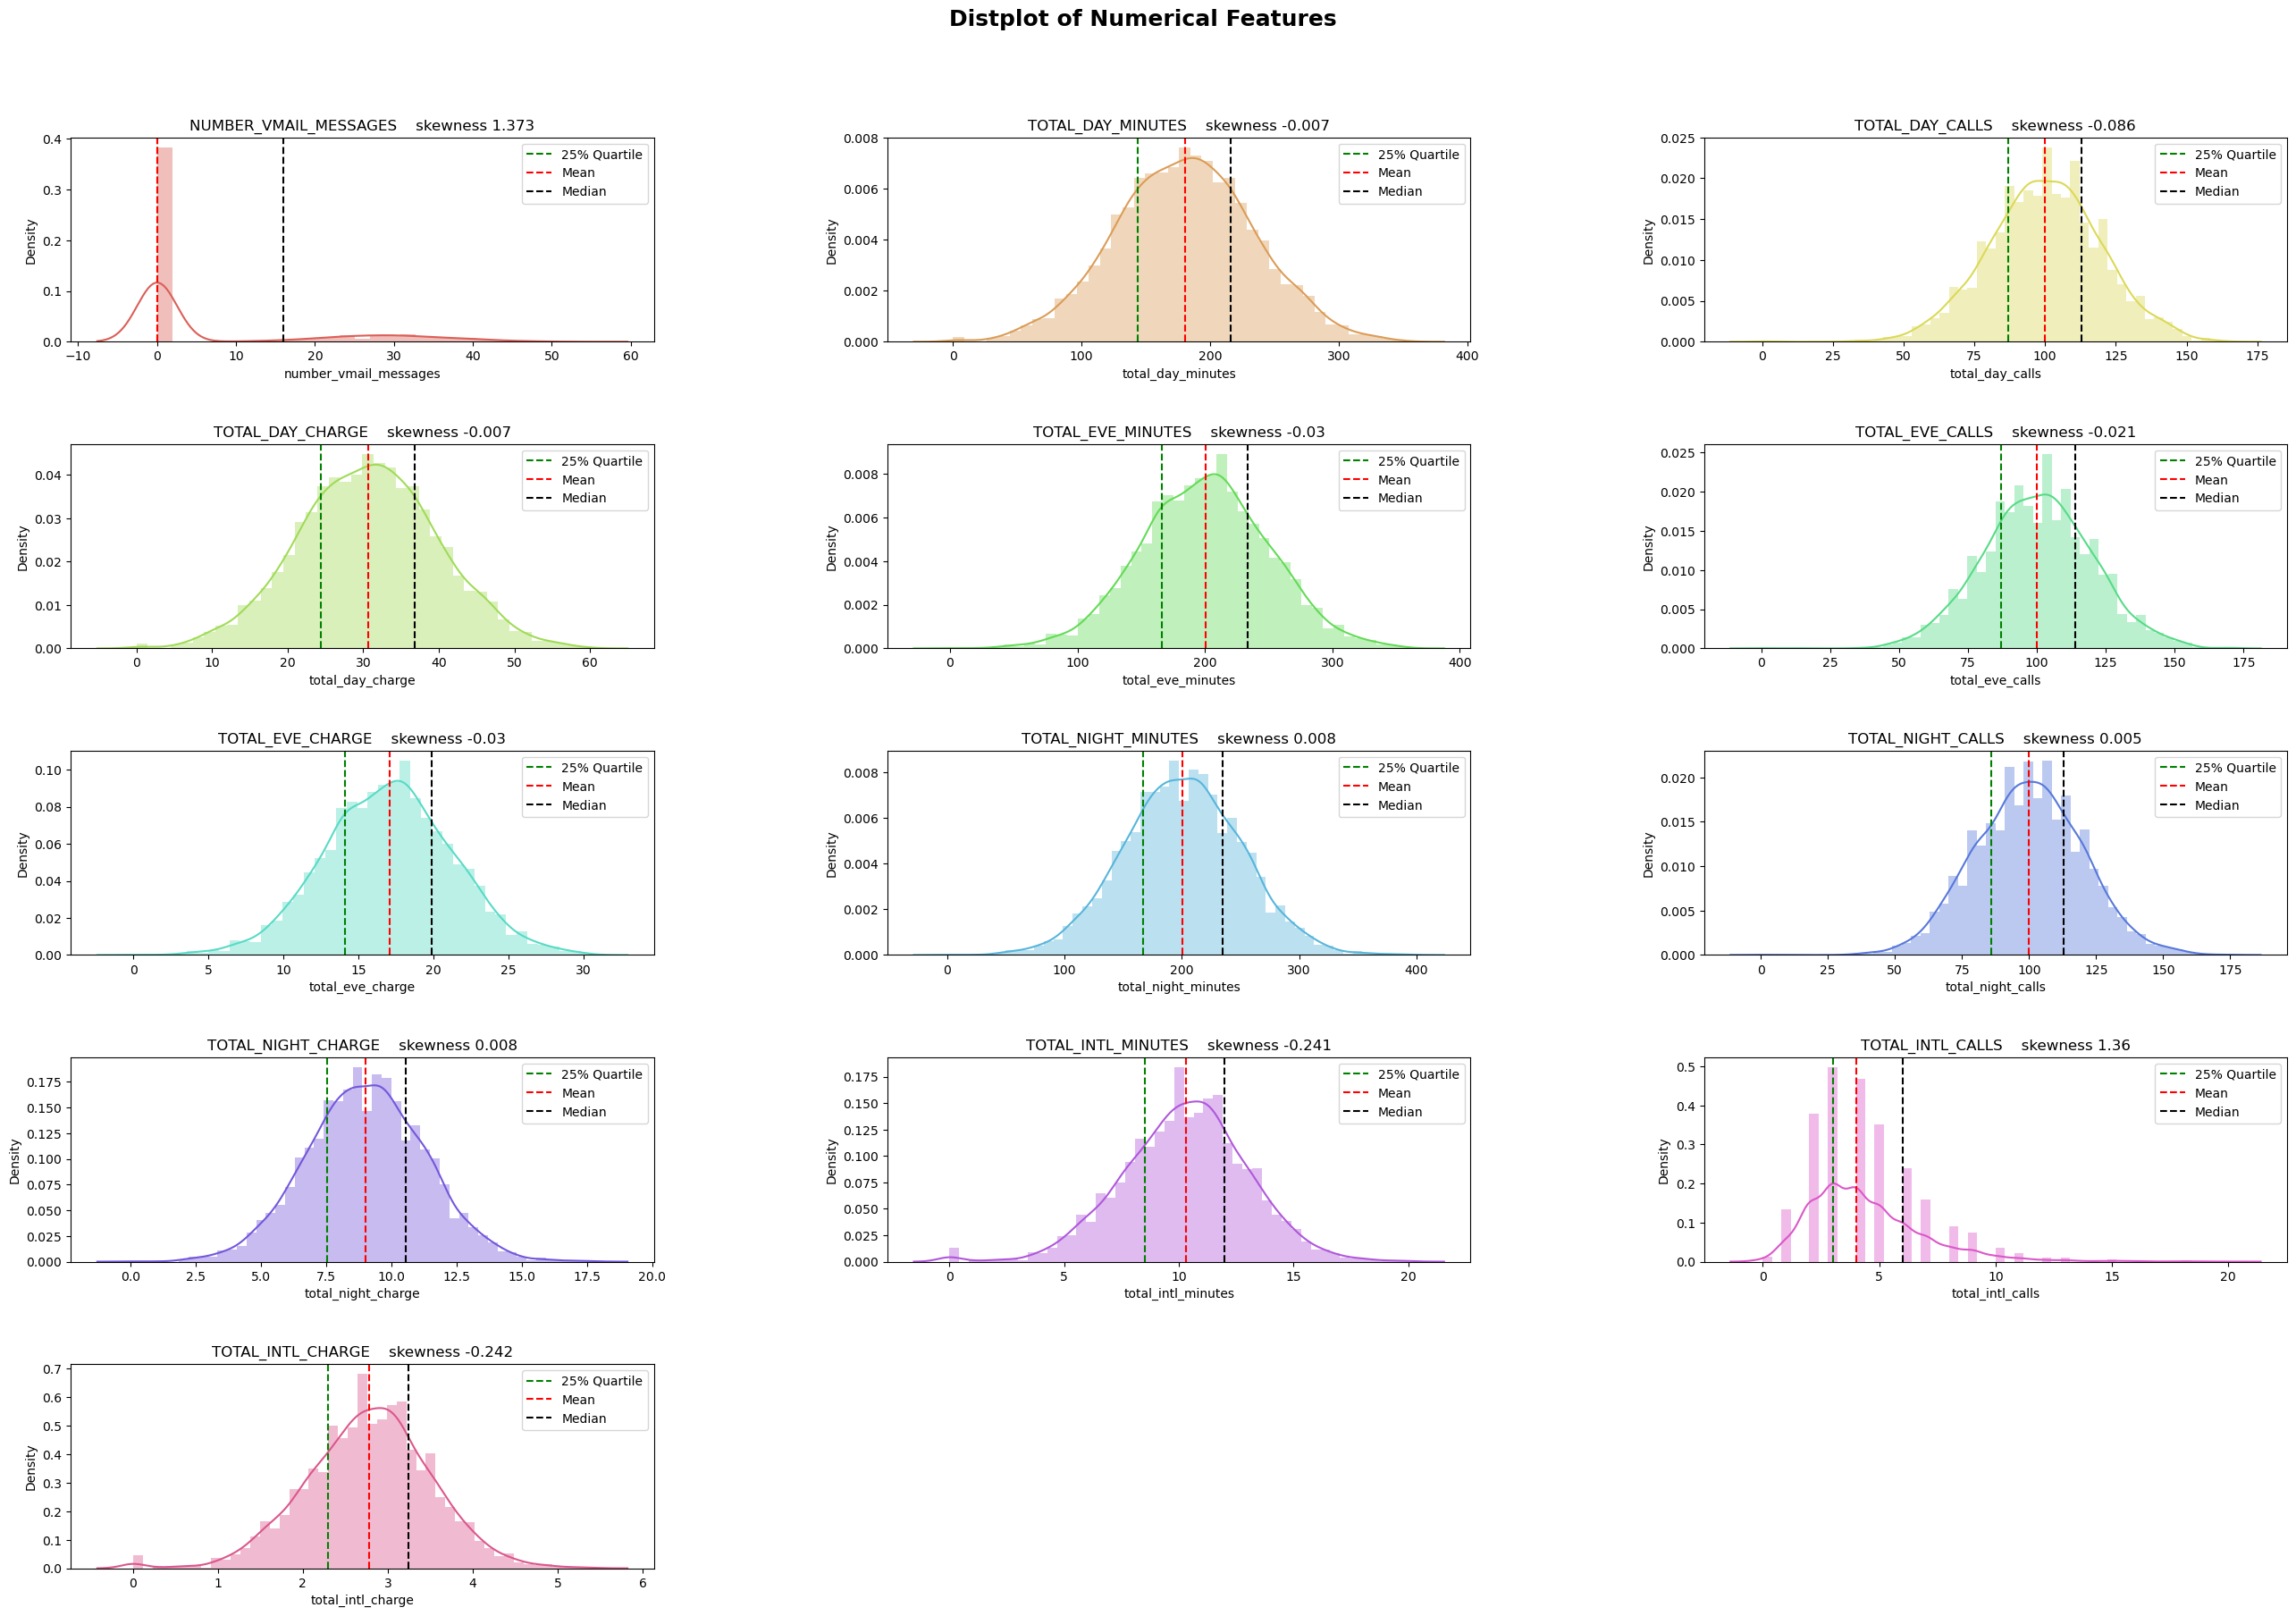

In [15]:
# Set up the figure and adjust spacing
fig, axes = plt.subplots(6, 3, figsize=(32, 24))
fig.suptitle('Distplot of Numerical Features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92, hspace=0.5, wspace=0.4)

# Iterate over numerical columns
for i, col in enumerate(num_columns):
    ax = axes.flatten()[i]
    
    # Plot the distribution
    sns.distplot(df[col], color=colors[i], ax=ax)
    
    # Add vertical lines for quartiles, mean, and median
    for quantile, color, label in zip([0.25, 0.5, 0.75], ['green', 'red', 'black'], ['25% Quartile', 'Mean', 'Median']):
        ax.axvline(df[col].quantile(q=quantile), color=color, linestyle='--', label=label)
    
    # Set x-axis label, title, and legend
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}    skewness {round(df[col].skew(), 3)}')
    ax.legend(fontsize=10)

for i in range(1, 6):
    plt.delaxes(axes.flatten()[-i])

plt.show()

## 4.2 Bivariate analysis

### 4.2.1 Categorical columns

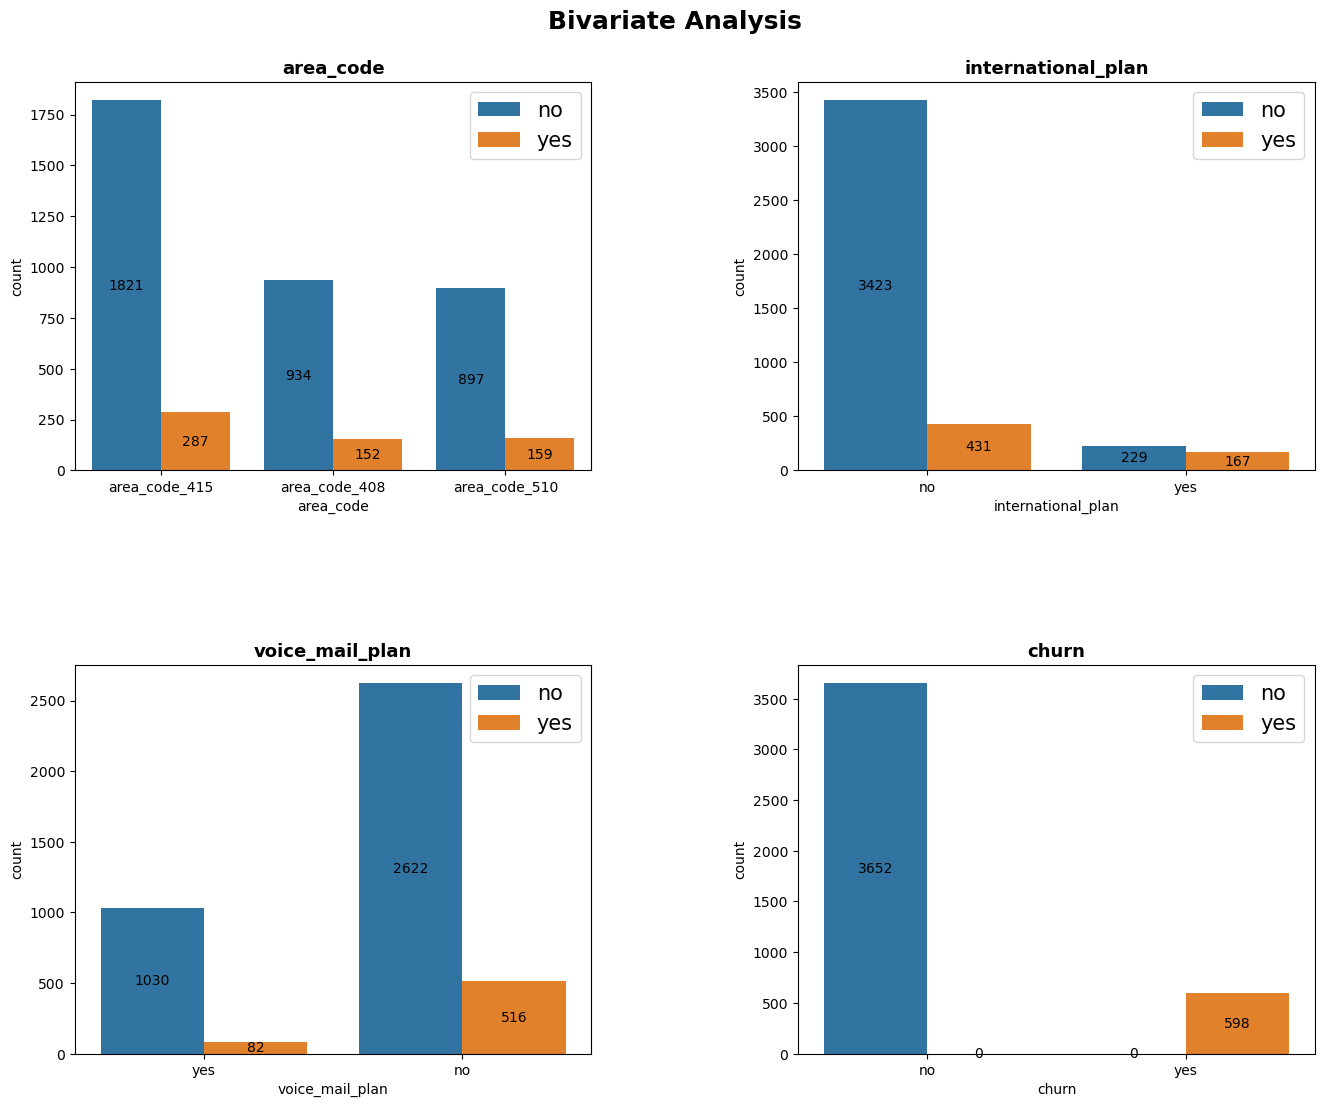

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92, hspace=0.5, wspace=0.4)

# Iterate over categorical columns
for i, col in enumerate(cat_columns):
    ax = axes.flatten()[i]
    
    # Plot countplot with hue
    sns.countplot(x=df[col], ax=ax, hue=df['churn'])
    
    # Set title, add bar labels, and set legend
    ax.set_title(col, size=13, fontweight='bold')
    for container in ax.containers:
        ax.bar_label(container, label_type='center')
    ax.legend(fontsize=15)

plt.show()

### 4.2.2 Numerical columns

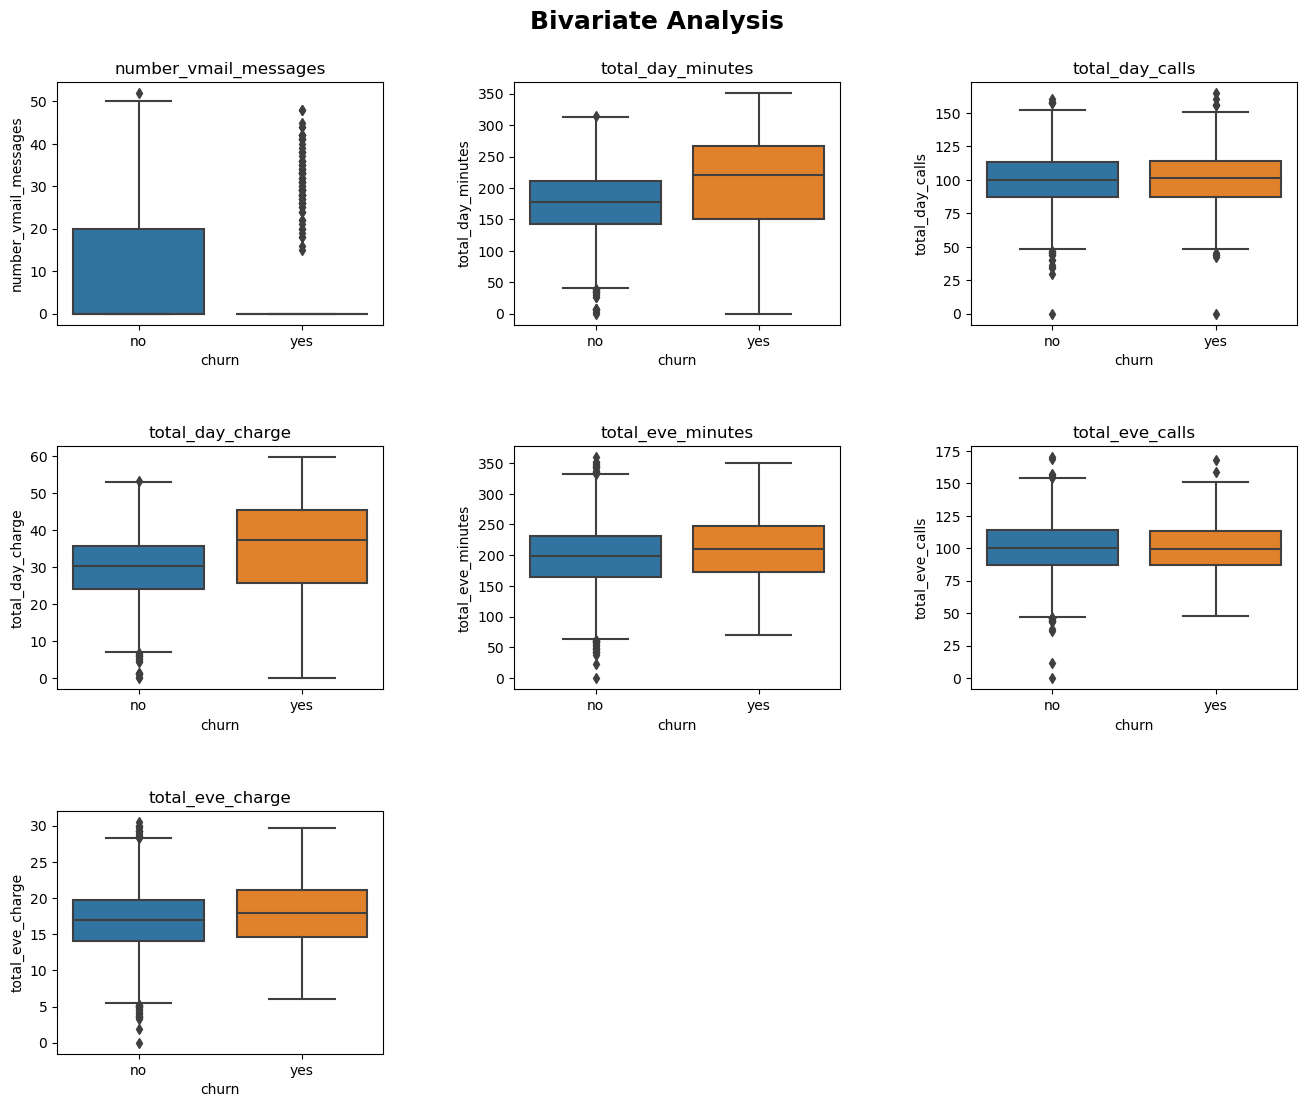

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92, hspace=0.5, wspace=0.4)


for i, col in enumerate(num_columns[:7]):
    ax = axes.flatten()[i]
    
    # Plot boxplot
    sns.boxplot(x='churn', y=col, ax=ax, data=df)
    
    # Set title
    ax.set_title(col)

for i in range(1, 3):
    plt.delaxes(axes.flatten()[-i])

plt.show()

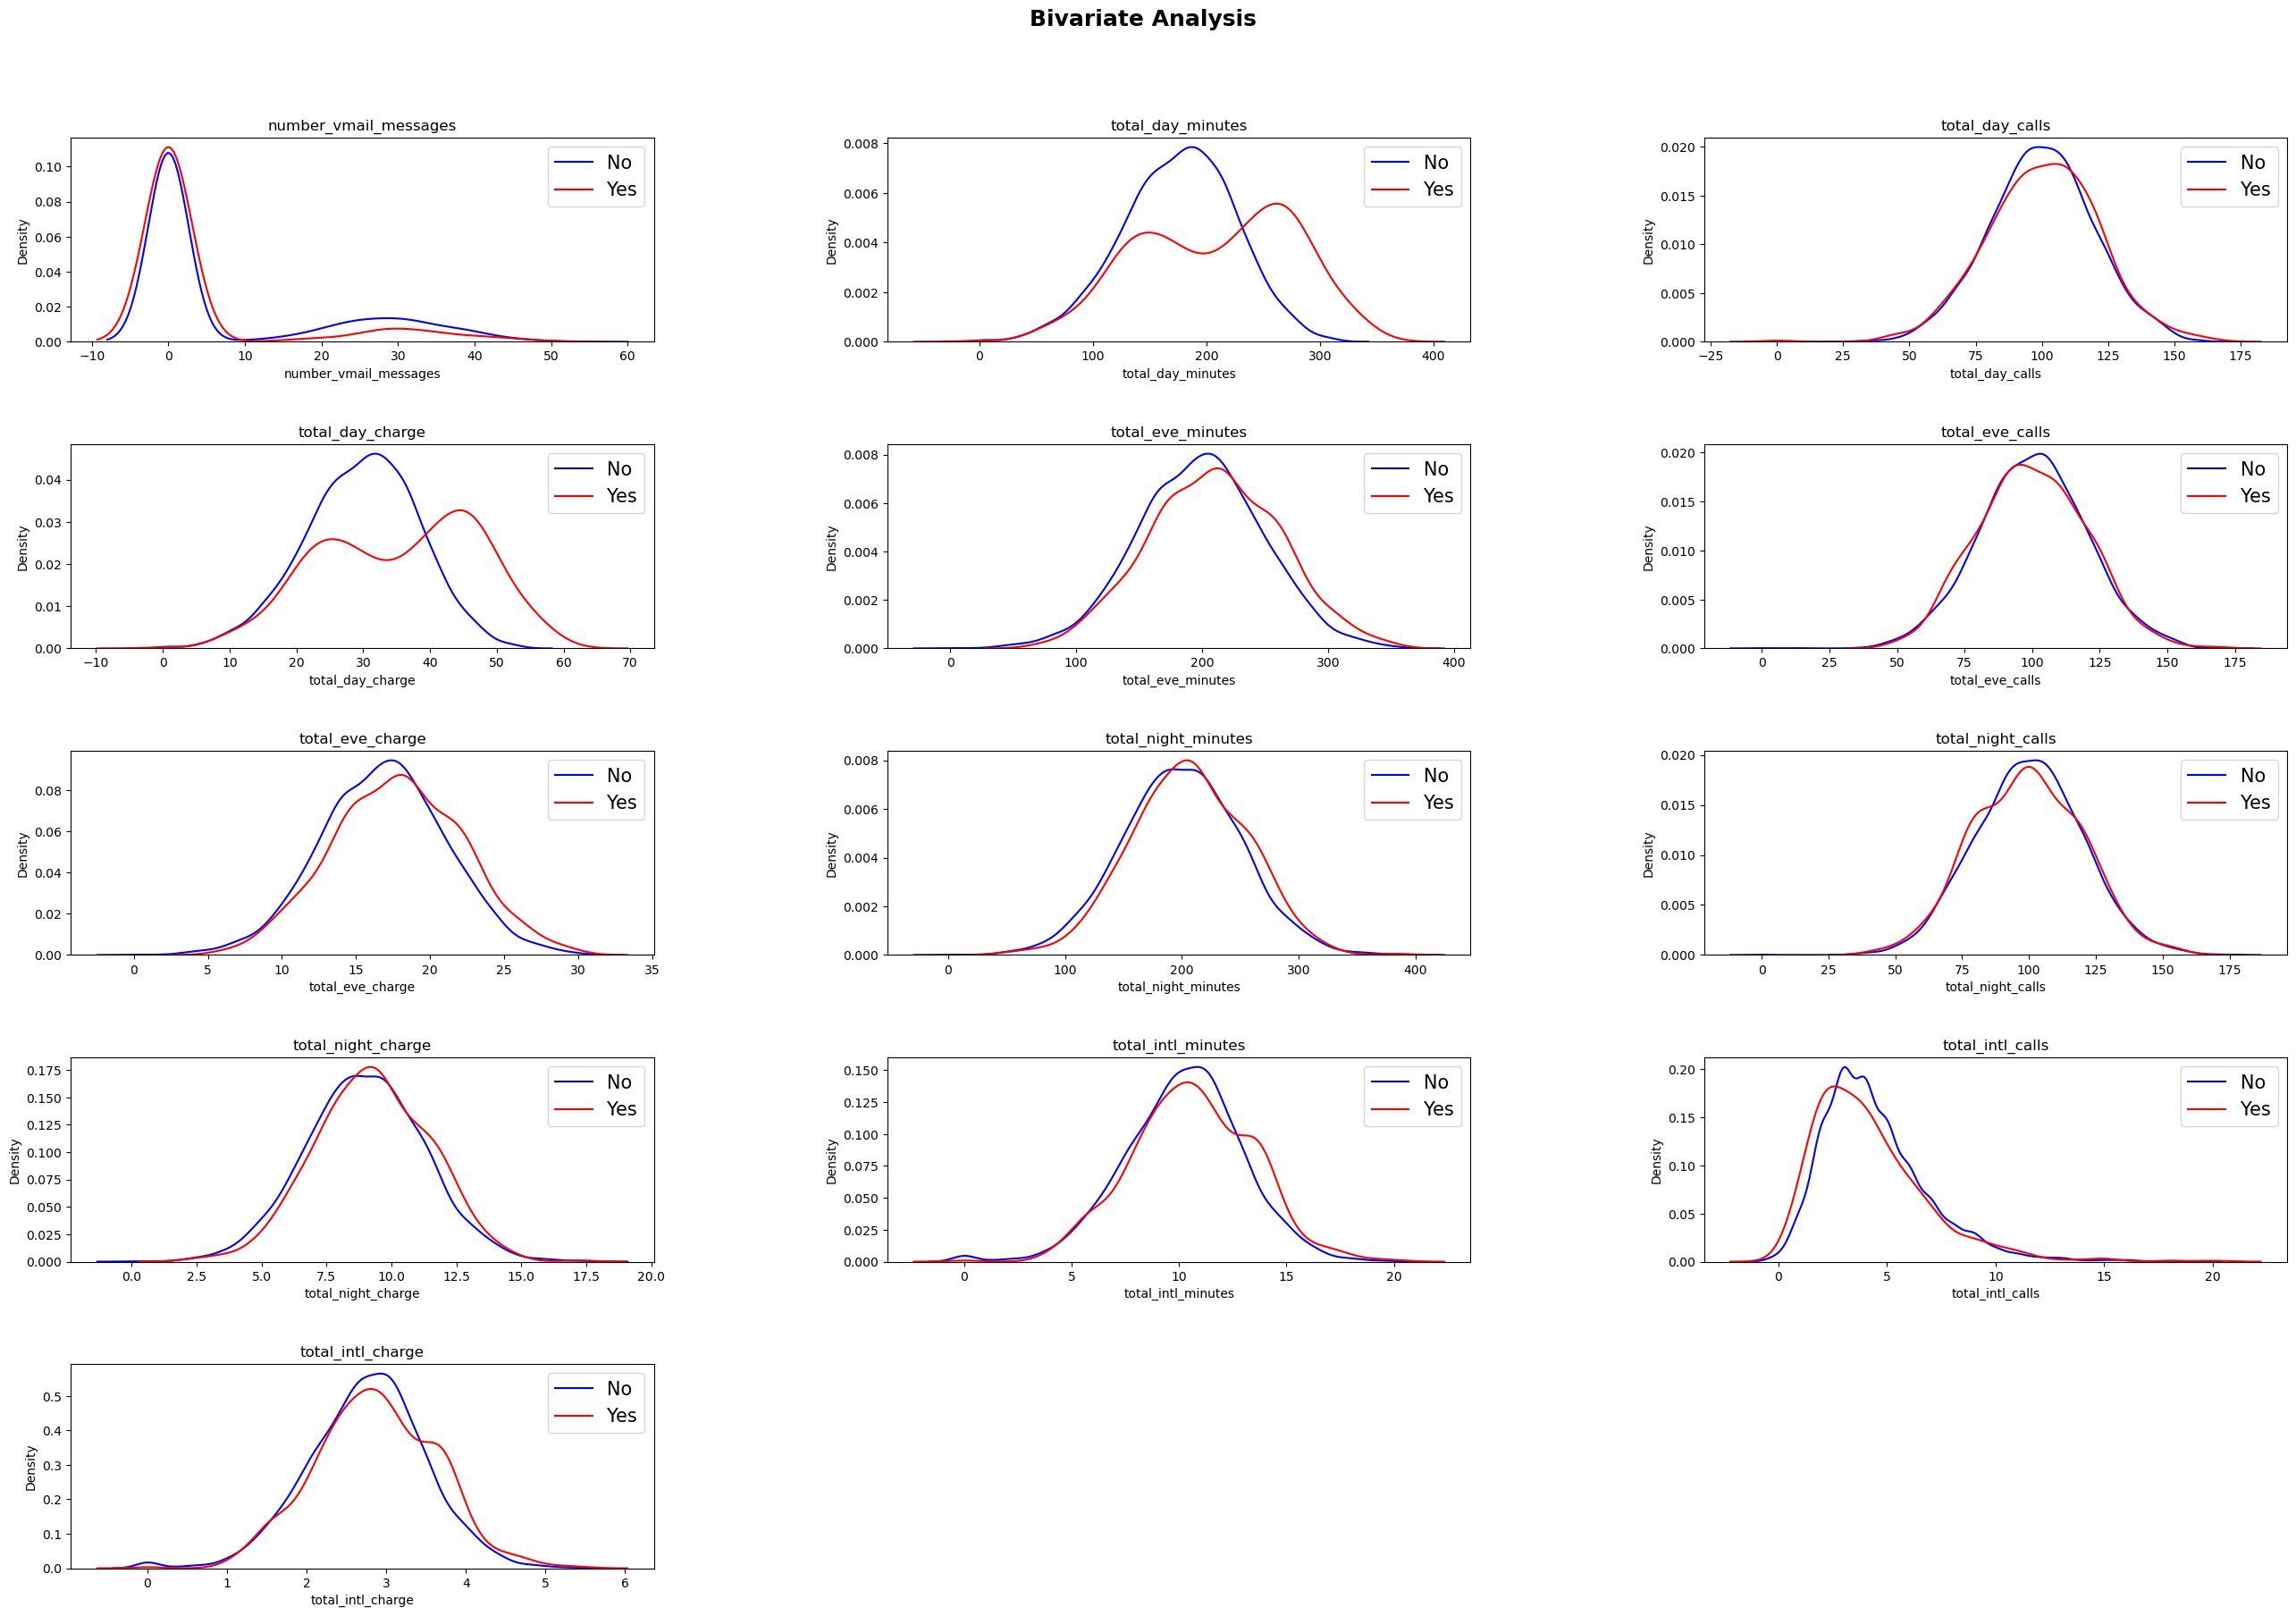

In [16]:
fig, axes = plt.subplots(6, 3, figsize=(32, 24))
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92, hspace=0.5, wspace=0.4)

# Iterate over numerical columns
for i, col in enumerate(num_columns):
    ax = axes.flatten()[i]
    
    # Plot distplots for 'no' and 'yes' churn
    sns.distplot(df[df['churn'] == 'no'][col], color='blue', ax=ax, hist=False)
    sns.distplot(df[df['churn'] == 'yes'][col], color='red', ax=ax, hist=False)
    
    # Set title and legend
    ax.set_title(col)
    labels = ['No', 'Yes']
    ax.legend(labels, fontsize=15)
    
for i in range(1, 6):
    plt.delaxes(axes.flatten()[-i])

plt.show()